In [3]:
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio.Align.AlignInfo import SummaryInfo
from Bio import AlignIO 
from Bio.SeqUtils import gc_fraction
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo
import matplotlib.pyplot as plt
from collections import Counter

Multiple Sequence Aligment using Clustal Omega

In [5]:
import subprocess

# Define input and output file paths
input_file = r"G:\HEM Spring 2023\Bioinformatics\First Project\New folder\Mergedconsensuswithomicroon.fasta"
output_file = "Mergedconesnsuswithimcron.ALN-CLUSTAL"


#guidetree_file = "guidee_tree.txt"
# Run Clustal Omega using subprocess
clustalo_path = r"C:\Users\PC\Downloads\clustal-omega-1.2.2-win64\clustalo.exe" 
cmd = [clustalo_path, "-i", input_file, "-o", output_file, "--outfmt=clustal","--output-order=tree-order"] 
subprocess.run(cmd, check=True)  # check=True raises an error if the command fails




#,"--guidetree-out=" + guidetree_file    



CompletedProcess(args=['C:\\Users\\PC\\Downloads\\clustal-omega-1.2.2-win64\\clustalo.exe', '-i', 'G:\\HEM Spring 2023\\Bioinformatics\\First Project\\New folder\\Mergedconsensuswithomicroon.fasta', '-o', 'Mergedconesnsuswithimcron.ALN-CLUSTAL', '--outfmt=clustal', '--output-order=tree-order'], returncode=0)

In [ ]:
'''''
def parse_clustalw_output(file_path):
    sequences = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) >= 2 and parts[0].startswith('hCoV-19'):  # Check if the line contains sequence information
                sequence = parts[1]  # Extract the sequence excluding the identifier
                sequence = ''.join([base for base in sequence if base in {'C', 'G', 'T', 'A'}])  # Filter out non-nucleotide characters
                if sequence:  # Check if the sequence is not empty
                    sequences.append(sequence)
                else:
                    print(f"Skipping empty sequence: {line}")  # Print a message for empty sequences
            else:
                print(f"Skipping non-sequence line: {line}")  # Print a message for non-sequence lines
    return sequences






def calculate_nucleotide_percentages(sequences):
    valid_bases = {'C', 'G', 'T', 'A'}

    num_sequences = len(sequences)
    if num_sequences == 0:
        print("No sequences to calculate percentages.")
        return {}

    sequence_length = len(sequences[0])  # Assuming all sequences have the same length
    # Initialize counters for each nucleotide base
    counts = {'C': [0] * sequence_length, 'G': [0] * sequence_length,
              'T': [0] * sequence_length, 'A': [0] * sequence_length}

    for sequence in sequences:
        for i, base in enumerate(sequence):
            if base in valid_bases and i < sequence_length:  # Check if the base is a valid nucleotide and if i is within sequence length
                counts[base][i] += 1

    # Calculate average percentage for each base
    percentages = {}
    for base, base_counts in counts.items():
        total_count = sum(base_counts)
        base_percentages = [count / total_count * 100 if total_count > 0 else 0 for count in base_counts]
        percentages[base] = base_percentages

    return percentages




# Replace 'path_to_clustalw_output.txt' with the actual path to your ClustalW output file
clustalw_file_path = r"G:\HEM Spring 2023\Bioinformatics\First Project\Omicron.ALN-CLUSTAL"



# Parse ClustalW output to get sequences
aligned_sequences = parse_clustalw_output(clustalw_file_path)

print("Content of aligned_sequences:")
print(aligned_sequences)

# Calculate percentages for the aligned sequences
aligned_percentages = calculate_nucleotide_percentages(aligned_sequences)

# Print the percentages for each base in the aligned sequences
for base, percentages in aligned_percentages.items():
    print(f"{base}: {percentages}")
    '''


Average Percentage for Reference Sequences

In [4]:
def calculate_avg_percentages(fasta_file):
    counts = {"C": [], "A": [], "T": [], "G": []}
    lengths = []

    for record in SeqIO.parse(fasta_file, "fasta"):
        sequence = str(record.seq)
        length = len(sequence)
        lengths.append(length)
        for nucleotide in counts:
            count = sequence.count(nucleotide)
            counts[nucleotide].append(count)

    percentages = {nucleotide: [count / length * 100 for count, length in zip(counts[nucleotide], lengths)] for nucleotide in counts}

    avg_percentages = {nucleotide: sum(percentages[nucleotide]) / len(percentages[nucleotide]) for nucleotide in percentages}

    return avg_percentages

# Example usage:
file_path = r"G:\HEM Spring 2023\Bioinformatics\First Project\New folder\gisaid_hcov-19_2024_05_18_16(newdelta).fasta"
result = calculate_avg_percentages(file_path)
print("Average percentages:")
for nucleotide, percentage in result.items():
    print(f"{nucleotide}: {percentage:.2f}%")

Average percentages:
C: 18.30%
A: 29.94%
T: 32.18%
G: 19.59%


Average Percentage for Case Sequences

In [5]:


file_path = r"G:\HEM Spring 2023\Bioinformatics\First Project\gisaid_hcov-19_2024_05_07_18.fasta"
result = calculate_avg_percentages(file_path)
print("Average percentages:")
for nucleotide, percentage in result.items():
    print(f"{nucleotide}: {percentage:.2f}%")


Average percentages:
C: 17.89%
A: 29.28%
T: 31.60%
G: 19.19%


Calculating Average CG Content for reference sequences

In [6]:

def calculate_avg_gc_content(fasta_file):
    gc_contents = []

    for record in SeqIO.parse(fasta_file, "fasta"):
        gc_content = gc_fraction(record.seq) * 100
        gc_contents.append(gc_content)

    avg_gc_content = sum(gc_contents) / len(gc_contents)
    return avg_gc_content

# Example usage:
file_path = r"G:\HEM Spring 2023\Bioinformatics\First Project\New folder\gisaid_hcov-19_2024_05_18_16(newdelta).fasta"
avg_gc_content = calculate_avg_gc_content(file_path)
print(f"Average CG content: {avg_gc_content:.2f}%")


Average CG content: 37.88%


Calculating Average CG Content for Case Sequences

In [7]:
file_path = r"G:\HEM Spring 2023\Bioinformatics\First Project\gisaid_hcov-19_2024_05_07_18.fasta"
avg_gc_content = calculate_avg_gc_content(file_path)
print(f"Average CG content: {avg_gc_content:.2f}%")

Average CG content: 37.85%


Consensus sequence

In [11]:

# Load the Clustal alignment file
alignment = AlignIO.read(r"G:\HEM Spring 2023\Bioinformatics\First Project\New folder\deltaaa.ALN-CLUSTAL", "clustal")

# Initialize an empty list to store consensus sequence
consensus_seq = []

# Iterate over each position in the alignment
for column in range(alignment.get_alignment_length()):
    # Initialize a dictionary to count nucleotide/amino acid frequencies
    counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0, '-': 0}  # Modify for amino acids if needed
    
    # Count occurrences of each nucleotide/amino acid in the column, skip ambiguous characters
    for record in alignment:
        nucleotide = record.seq[column]
        if nucleotide in counts:
            counts[nucleotide] += 1
    
    # Determine the most frequent nucleotide/amino acid at this position
    consensus_nucleotide = max(counts, key=counts.get)
    
    # Add the consensus nucleotide/amino acid to the consensus sequence list
    consensus_seq.append(consensus_nucleotide)

# Convert the consensus sequence list to a string

consensus_sequence_str = ''.join(consensus_seq)

# Create a SeqRecord for the consensus sequence
consensus_sequence = SeqRecord(Seq(consensus_sequence_str), id="Consensus", description="Consensus sequence")

# Save the consensus sequence to a FASTA file
output_file = "consensus_sequence.fasta"
SeqIO.write(consensus_sequence, output_file, "fasta")

print(f"Consensus sequence saved to {output_file}")



#print("Consensus Sequence:", consensus_sequence_str)





Consensus sequence saved to consensus_sequence.fasta


Constructing phylogenetic tree between 20 sequences

<Figure size 1500x1000 with 0 Axes>

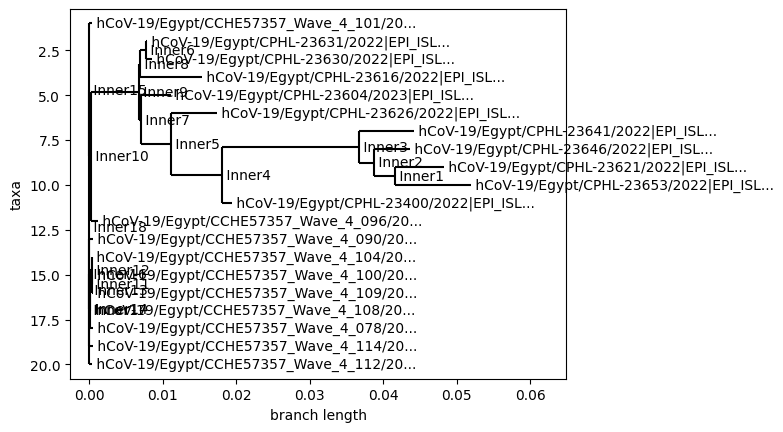

In [4]:
alignment = AlignIO.read(r"G:\HEM Spring 2023\Bioinformatics\First Project\New folder\Mergeddeltaomicron.ALN-CLUSTAL" ,"clustal" )
alignment = MultipleSeqAlignment(alignment)

calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

constructor = DistanceTreeConstructor(calculator)
tree = constructor.nj(dm)

# Draw and display the tree

Phylo.write(tree, "output_tree.newick", "newick")
plt.figure(figsize=(15, 10))  # Set the figure size (adjust as needed)
Phylo.draw(tree, do_show=False)  # Pass do_show=False to prevent automatic display

# Save the tree as an image file (e.g., PNG)
plt.savefig("output_tree.png")

# Optionally, display the tree
plt.show()



Consensus compared with case sequences

In [6]:

#dissimilarity percentage
alignment = AlignIO.read(r"G:\HEM Spring 2023\Bioinformatics\First Project\New folder\Mergedconesnsuswithimcron.ALN-CLUSTAL", "clustal")
consensus_seq = str(alignment[0].seq)  # Assuming the first sequence is the consensus


# Step 3: Identify dissimilar positions
dissimilar_positions = []
for i in range(len(consensus_seq)):
    column = alignment[:, i]  # Extract the column at position i
    # Count the frequency of each nucleotide in the column (excluding the consensus sequence)
    non_consensus_nucleotides = column[1:]  # Assuming first sequence is consensus
    nucleotide_counts = Counter(non_consensus_nucleotides)
    dominant_nucleotide = nucleotide_counts.most_common(1)[0][0]  # Most frequent nucleotide

    if consensus_seq[i] != dominant_nucleotide:  # Compare with the consensus nucleotide
        dissimilar_positions.append(i)

# Print the positions with dissimilarities
print("Dissimilar positions:", dissimilar_positions)

# Step 4: Extract dissimilar columns
def extract_dissimilar_columns(alignment, positions):
    extracted_columns = []
    for seq in alignment:
        extracted_columns.append("".join([seq[i] for i in positions]))
    return extracted_columns

# Extract the dissimilar columns for each sequence
dissimilar_columns = extract_dissimilar_columns(alignment, dissimilar_positions)

# Print the dissimilar columns for each sequence
for idx, cols in enumerate(dissimilar_columns):
    print(f"Sequence {idx+1}: {cols}")



'''
alignment = AlignIO.read(r"G:\HEM Spring 2023\Bioinformatics\First Project\Mergedconsensuswithdelta.ALN-CLUSTAL", "clustal")
consensus_seq = str(alignment[0].seq)  # Assuming the first sequence is the consensus


# Step 3: Identify dissimilar positions
dissimilar_positions = []
for i in range(len(consensus_seq)):
    column = alignment[:, i]
    if len(set(column)) > 1:
        dissimilar_positions.append(i)

print("Dissimilar positions:", dissimilar_positions)


def extract_dissimilar_columns(alignment, positions):
    extracted_columns = []
    for seq in alignment:
        extracted_columns.append("".join([seq[i] for i in positions]))
    return extracted_columns

dissimilar_columns = extract_dissimilar_columns(alignment, dissimilar_positions)

for idx, cols in enumerate(dissimilar_columns):
    print(f"Sequence {idx+1}: {cols}")
    '''

<>:37: SyntaxWarning: invalid escape sequence '\H'
<>:37: SyntaxWarning: invalid escape sequence '\H'
C:\Users\PC\AppData\Local\Temp\ipykernel_23512\3574104499.py:37: SyntaxWarning: invalid escape sequence '\H'
  '''


Dissimilar positions: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 209, 669, 883, 1058, 1626, 1665, 2789, 4180, 4183, 4320, 4434, 4435, 4436, 4437, 4438, 4439, 4440, 4441, 4442, 4443, 4444, 4445, 4446, 4447, 4481, 4482, 4483, 4484, 4485, 4486, 4487, 4488, 4489, 4490, 4491, 4492, 4493, 4494, 4495, 4496, 4497, 4498, 4499, 4500, 4501, 4502, 4503, 4504, 4505, 4506, 4507, 4508, 4509, 4510, 4511, 4512, 4513, 4514, 4515, 4516, 4517, 4518, 4519, 4520, 4521, 4522, 4523, 4524, 4525, 4526, 4530, 4531, 4532, 6284, 6401, 7123, 8985, 9343, 9423, 9533, 10197, 10264, 10446, 10448, 11108, 11200, 11287, 11288, 11289, 11290, 11291, 11292, 11293, 11294, 11295, 11331, 12159, 12309, 12879, 15450, 15520, 15713, 16380, 16465, 16554, 16615, 17409, 18062, 18063, 18064, 18065, 18066, 18067, 18068, 18069, 18070, 18071, 18072, 18073, 18074, 18075, 18076, 18077, 18078, 18079, 18080, 18081, 18082, 18083, 18084, 18085, 18086, 18138, 18139, 18140, 18141, 18142, 18143, 1814

'\nalignment = AlignIO.read(r"G:\\HEM Spring 2023\\Bioinformatics\\First Project\\Mergedconsensuswithdelta.ALN-CLUSTAL", "clustal")\nconsensus_seq = str(alignment[0].seq)  # Assuming the first sequence is the consensus\n\n\n# Step 3: Identify dissimilar positions\ndissimilar_positions = []\nfor i in range(len(consensus_seq)):\n    column = alignment[:, i]\n    if len(set(column)) > 1:\n        dissimilar_positions.append(i)\n\nprint("Dissimilar positions:", dissimilar_positions)\n\n\ndef extract_dissimilar_columns(alignment, positions):\n    extracted_columns = []\n    for seq in alignment:\n        extracted_columns.append("".join([seq[i] for i in positions]))\n    return extracted_columns\n\ndissimilar_columns = extract_dissimilar_columns(alignment, dissimilar_positions)\n\nfor idx, cols in enumerate(dissimilar_columns):\n    print(f"Sequence {idx+1}: {cols}")\n    '

In [1]:
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 209, 669, 883, 1058, 1626, 1665, 2789, 4180, 4183, 4320, 4434, 4435, 4436, 4437, 4438, 4439, 4440, 4441, 4442, 4443, 4444, 4445, 4446, 4447, 4481, 4482, 4483, 4484, 4485, 4486, 4487, 4488, 4489, 4490, 4491, 4492, 4493, 4494, 4495, 4496, 4497, 4498, 4499, 4500, 4501, 4502, 4503, 4504, 4505, 4506, 4507, 4508, 4509, 4510, 4511, 4512, 4513, 4514, 4515, 4516, 4517, 4518, 4519, 4520, 4521, 4522, 4523, 4524, 4525, 4526, 4530, 4531, 4532, 6284, 6401, 7123, 8985, 9343, 9423, 9533, 10197, 10264, 10446, 10448, 11108, 11200, 11287, 11288, 11289, 11290, 11291, 11292, 11293, 11294, 11295, 11331, 12159, 12309, 12879, 15450, 15520, 15713, 16380, 16465, 16554, 16615, 17409, 18062, 18063, 18064, 18065, 18066, 18067, 18068, 18069, 18070, 18071, 18072, 18073, 18074, 18075, 18076, 18077, 18078, 18079, 18080, 18081, 18082, 18083, 18084, 18085, 18086, 18138, 18139, 18140, 18141, 18142, 18143, 18144, 18145, 18146, 18147, 18148, 18149, 18150, 18151, 18152, 18153, 18162, 19219, 19954, 20054, 20267, 21617, 21632, 21633, 21634, 21635, 21636, 21637, 21638, 21639, 21640, 21764, 21765, 21766, 21767, 21768, 21769, 21845, 21986, 22199, 22577, 22673, 22678, 22685, 22687, 22774, 22785, 22812, 22881, 22991, 23012, 23017, 23054, 23062, 23074, 23115, 23524, 23598, 23603, 23635, 23636, 23637, 23638, 23639, 23640, 23641, 23642, 23643, 23644, 23645, 23646, 23647, 23648, 23649, 23650, 23651, 23652, 23653, 23654, 23655, 23656, 23657, 23658, 23659, 23660, 23661, 23662, 23663, 23664, 23665, 23666, 23667, 23668, 23669, 23670, 23671, 23672, 23673, 23674, 23675, 23676, 23677, 23678, 23679, 23680, 23681, 23682, 23683, 23684, 23685, 23686, 23687, 23688, 23689, 23690, 23691, 23692, 23693, 23694, 23695, 23696, 23697, 23698, 23699, 23700, 23701, 23702, 23703, 23704, 23705, 23706, 23707, 23708, 23709, 23710, 23711, 23712, 23713, 23714, 23715, 23716, 23717, 23718, 23719, 23720, 23721, 23722, 23723, 23724, 23725, 23726, 23727, 23728, 23729, 23730, 23731, 23732, 23733, 23734, 23735, 23736, 23737, 23738, 23739, 23740, 23741, 23742, 23743, 23744, 23745, 23746, 23747, 23748, 23749, 23750, 23751, 23752, 23753, 23754, 23755, 23756, 23757, 23758, 23759, 23760, 23761, 23762, 23763, 23764, 23765, 23766, 23767, 23768, 23769, 23770, 23771, 23772, 23773, 23774, 23775, 23776, 23777, 23778, 23779, 23780, 23781, 23782, 23783, 23784, 23785, 23786, 23787, 23788, 23789, 23790, 23791, 23792, 23793, 23794, 23795, 23796, 23797, 23798, 23799, 23800, 23801, 23802, 23803, 23804, 23805, 23806, 23807, 23808, 23809, 23810, 23811, 23812, 23813, 23814, 23815, 23816, 23817, 23818, 23819, 23820, 23821, 23822, 23823, 23824, 23825, 23826, 23827, 23828, 23829, 23830, 23831, 23832, 23833, 23834, 23835, 23836, 23837, 23838, 23839, 23840, 23841, 23842, 23843, 23844, 23845, 23846, 23847, 23848, 23849, 23850, 23851, 23853, 23947, 24409, 24423, 24468, 24999, 25468, 25583, 26059, 26269, 26528, 26576, 26708, 26766, 26935, 26995, 26996, 26997, 26998, 26999, 27000, 27001, 27002, 27003, 27004, 27005, 27006, 27007, 27008, 27009, 27010, 27011, 27012, 27013, 27014, 27015, 27016, 27017, 27018, 27019, 27020, 27021, 27022, 27023, 27024, 27025, 27026, 27027, 27028, 27029, 27030, 27031, 27032, 27033, 27034, 27035, 27036, 27037, 27038, 27039, 27040, 27041, 27042, 27043, 27044, 27045, 27046, 27047, 27048, 27070, 27071, 27072, 27073, 27074, 27075, 27076, 27077, 27078, 27079, 27080, 27081, 27082, 27083, 27084, 27085, 27086, 27087, 27088, 27089, 27383, 27512, 27637, 27751, 27806, 27873, 27888, 28270, 28310, 28329, 28361, 28362, 28363, 28364, 28365, 28366, 28367, 28368, 28369, 28460, 28880, 28881, 28882, 28915, 29401, 29509, 29733, 29734, 29735, 29736, 29737, 29738, 29739, 29740, 29741, 29742, 29743, 29744, 29745, 29746, 29747, 29748, 29749, 29750, 29751, 29752, 29753, 29754, 29755, 29756, 29757, 29758, 29847, 29848, 29849, 29850, 29851, 29852, 29853, 29854, 29855, 29856, 29857, 29858, 29859, 29860, 29861, 29862, 29863, 29864, 29865, 29866, 29867, 29868, 29869, 29870, 29871, 29872, 29873, 29874, 29875, 29888, 29889, 29890, 29891, 29892, 29893, 29894, 29895, 29896, 29897, 29898, 29899, 29900, 29901, 29902]
print(len(x))

618
